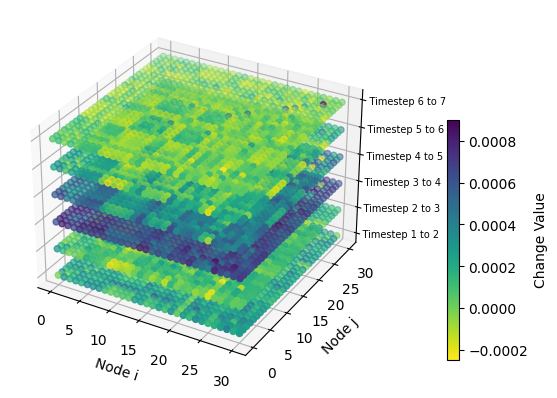

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load the data
adj = np.load("/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/adj.npy")

# compute average and changes
avg_adj = np.mean(adj, axis=0)
changes = np.diff(avg_adj, axis=0)

# create a grid of x, y, z values
x, y = np.meshgrid(np.arange(changes.shape[1]), np.arange(changes.shape[2]))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# plot a 3D scatter plot for each time step
cbar_plot = None
for i in range(changes.shape[0]):
    cbar_plot = ax.scatter(
        x, y, i, c=changes[i].flatten(), cmap=plt.cm.viridis_r
    )  # reversed colormap

ax.set_xlabel("Node i")
ax.set_ylabel("Node j")

# move z-axis tick labels further from plot
ax.set_zticks(np.arange(changes.shape[0]))
ax.set_zticklabels(
    [f"            Timestep {i+1} to {i+2}" for i in range(changes.shape[0])],
    fontsize=7,
)  # decrease label size

# create more space on the right for the color bar
plt.subplots_adjust(right=0.9)

# add a color bar
cbar = fig.colorbar(cbar_plot)  # shrink color bar
cbar.set_label("Change Value")

# move color bar to the right
cbar.ax.set_position([0.85, 0.15, 0.05, 0.5])


plt.show()